# Определение возраста покупателей

**Описание проекта:** сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
 - Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
 - Контролировать добросовестность кассиров при продаже алкоголя.

Цель работы: обучить модель способную по фотографии определить приблизительный возраст человека.

**Ход работы:**

1 Исследовательский анализ данных.
* Импорт необходимых библиотек;
* Загрузка файла с таргетом - возрастом людей на фотографиях, первоначальный анализ таргета;
* Загрузка фотографий;
* Проверка корректности осуществления загрузки фотографий в материнскую папку, при неккоретной загрузке - повторный анализ таргета.

2 Обучение модели предсказания возраста.
* Написание функций загрузчиков тренировочной и тестовой выборок;
* Определение базисной модели или написание собственной многослойной сверточной архитектуры;
* Обучение модели и проверка результатов.

**Общий вывод:** анализ полученной модели и выводы по проделанной работе, возможные рекомендации.

## Исследовательский анализ данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Закрепим константы

In [2]:
RANDOM_STATE = 42

Загрузим таргеты и наименование файлов с фотографиями лиц людей.

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')

Выполним первоначальный анализ таргета:

In [4]:
def first_look(df):
    df.info()
    display(df.describe(), df.head(), df.tail())

In [5]:
first_look(labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


,file_name,real_age
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20
7590,007612.jpg,47


Можно заметить следующие особенности: в выборке 7591 таргет, при этом названия фото начинаются с 000000.jpg, заканчивается 007612.jpg - следовательно, в результате загрузки были утеряны 22 фотографии; средний возраст людей на фотографиях - 31 год, медианный - 29 лет.

Выполним загрузку фотографий для проведения анализа

In [6]:
datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_datagen_flow = datagen.flow_from_dataframe(
    dataframe = labels,
    directory = '/datasets/faces/final_files/',
    x_col = 'file_name',
    y_col = 'real_age',
    batch_size = 16,
    subset = 'training',
    class_mode = 'raw',
    seed = RANDOM_STATE)

Found 7591 validated image filenames.


In [8]:
train_datagen_flow.samples

7591

В указанной папке находятся все фото указанные в файле с таргетами. Дополнительный анализ таргета не требуется.

Построим гистограмму возраста

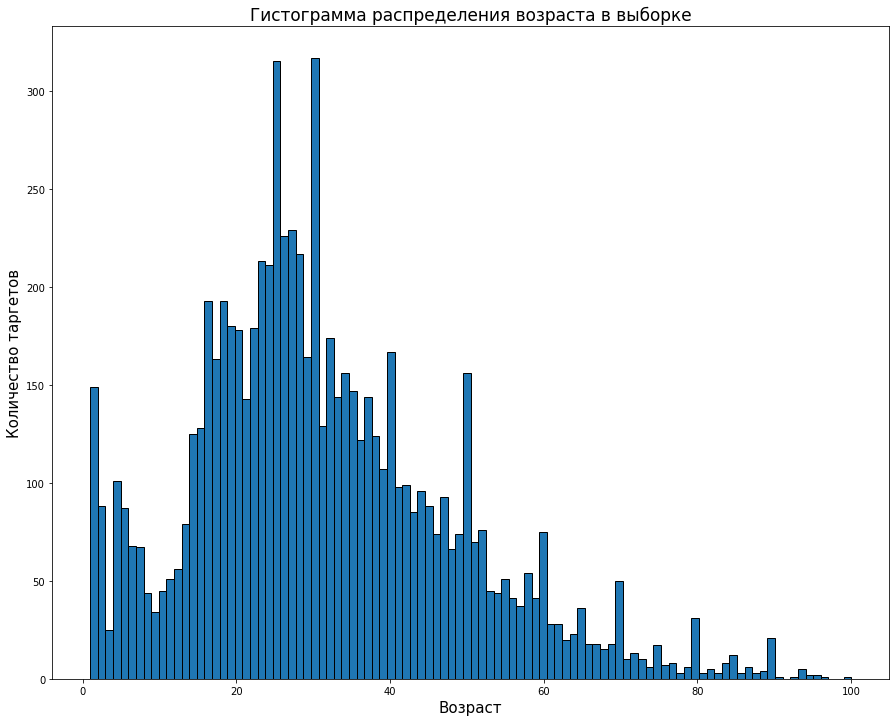

In [10]:
labels['real_age'].plot(kind = 'hist', bins = 100, figsize = (15,12), edgecolor='black')
plt.title('Гистограмма распределения возраста в выборке', size = 17)
plt.xlabel('Возраст', size = 15)
plt.ylabel('Количество таргетов', size = 15)
plt.show()

На гистограмме можно увидеть ряд особенностей:

1) заметны пики на возрасте, кратном 10, что может говорить о том, что разметка данных или её часть осуществлялась не в соответсвии с паспортными данными, а по приблизительной оценке возраста;

2) экспоненциальное снижение количества фотографий людей разного, возраста может послужить примерной оценкой возрастного распределения населения Земли;

3) фогографий детей несовершеннолетнего возраста меньше, чем потенциально могло бы быть, что может говорить об удовлетворительном уровне цифровой гигиены родителей, которые контролируют своих детей.

Отберем несколько фотографий для вывода на экран

In [10]:
features, target = next(train_datagen_flow)

In [11]:
features.shape[1:]

(256, 256, 3)

Можем заметить, что изображения в нашей выборке имеют размер 256*256 пикселей в  3 цветовых канала

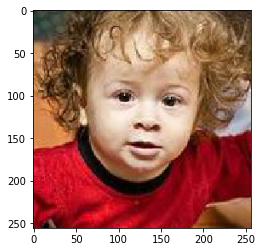

Возраст человека: 1 год 



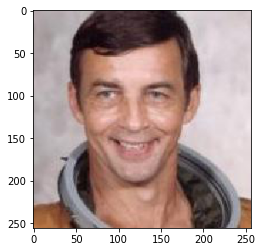

Возраст человека: 46 лет 



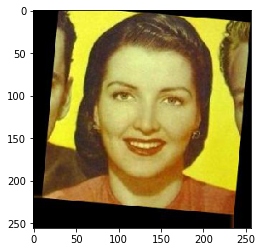

Возраст человека: 35 лет 



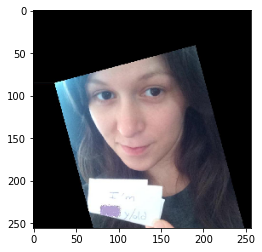

Возраст человека: 23 года 



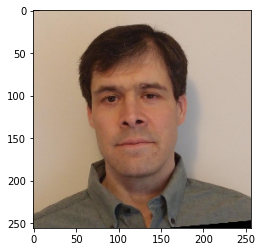

Возраст человека: 47 лет 



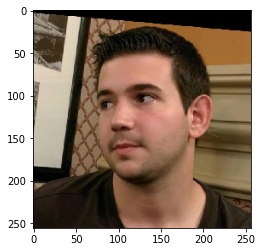

Возраст человека: 26 лет 



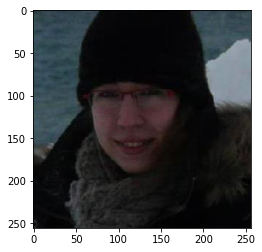

Возраст человека: 20 лет 



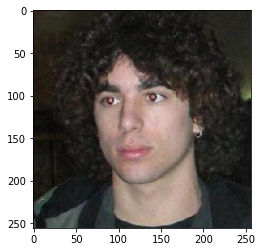

Возраст человека: 17 лет 



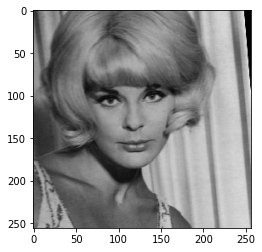

Возраст человека: 25 лет 



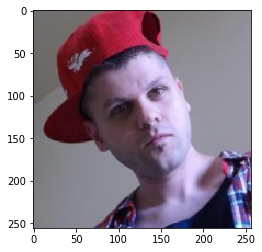

Возраст человека: 27 лет 



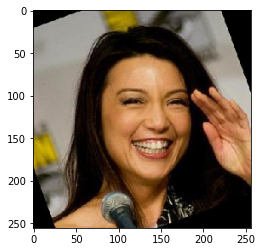

Возраст человека: 47 лет 



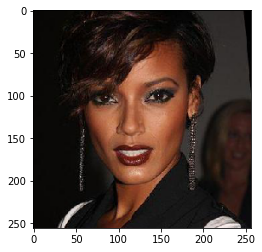

Возраст человека: 26 лет 



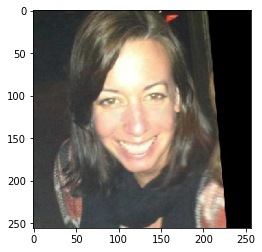

Возраст человека: 37 лет 



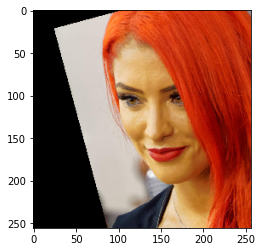

Возраст человека: 31 год 



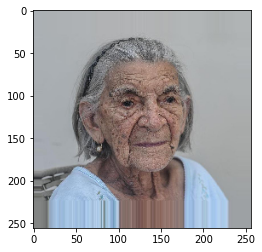

Возраст человека: 94 года 



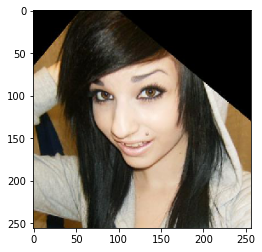

Возраст человека: 16 лет 



In [12]:
for i in range(len(target)):
    plt.imshow(features[i])
    plt.show()
    if target[i] % 10 == 1:
        print(f'Возраст человека: {target[i]} год','\n')
    elif target[i] % 10 < 5 and target[i] % 10 != 0:
        print(f'Возраст человека: {target[i]} года','\n')
    else:
        print(f'Возраст человека: {target[i]} лет','\n')

**Вывод:** загружены 7591 фотографий человеческих лиц с привязкой к таргету - возрасту человека, проведен осмотр нескольких фотографий, средний возраст людей - 31 год, медианный - 29 лет. Вывод случайных изображений помогает дать следующую оценку содержащимся в датасете фотографиям: они достаточно чистые: отсутствуют искажения, замыливания, лица приближены, являются центровой фигурой на всех фотографиях, ничем не закрыты. Присутствуют наклоны головы, люди не всегда смотрят в камеру, у людей разные головные уборы, прически, оттенки кожи, разная эмоция на лице. Такое разнообразие дает уверенность, что обученная модель сможет с достаточной точностью определять возраст по новым фотографиям.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25,
                             rescale = 1./255,
                             vertical_flip = True)
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size = (256,256),
        batch_size = 16,
        subset = 'training',
        class_mode = 'raw',
        seed = 42)

    return train_datagen_flow


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25,
                             rescale = 1./255,
                             vertical_flip = True)
    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size = (256,256),
        batch_size = 16,
        subset = 'validation',
        class_mode = 'raw',
        seed = 42)

    return test_datagen_flow


def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)
    model = Sequential()

    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr = 0.0001)

    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,  steps_per_epoch=None, validation_steps=None):

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              steps_per_epoch= steps_per_epoch,
              validation_steps = validation_steps,
              epochs = epochs,
              verbose=2)

    return model
```

```
Train for 356 steps, validate for 119 steps
Epoch 1/5
2025-07-10 18:23:45.622431: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-07-10 18:23:46.889636: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 79s - loss: 212.0853 - mae: 10.8624 - val_loss: 765.1791 - val_mae: 22.5429
Epoch 2/5
356/356 - 40s - loss: 99.9728 - mae: 7.6082 - val_loss: 182.8975 - val_mae: 10.5924
Epoch 3/5
356/356 - 39s - loss: 72.3368 - mae: 6.5023 - val_loss: 102.9533 - val_mae: 7.7996
Epoch 4/5
356/356 - 39s - loss: 56.0709 - mae: 5.7216 - val_loss: 83.9860 - val_mae: 7.0018
Epoch 5/5
356/356 - 40s - loss: 45.4460 - mae: 5.1307 - val_loss: 78.9416 - val_mae: 6.8946
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 78.6504 - mae: 6.8493

```

**Вывод** обученная модель достигла значения МАЕ на тестовой выборке 6.85 лет, что удовлетворяет критерию, поставленному заказчиком: МАЕ < 8.

## Анализ обученной модели

**Исследовательский анализ данных**: загружены 7591 фотографий человеческих лиц с привязкой к таргету - возрасту человека, проведен осмотр нескольких фотографий, средний возраст людей - 31 год, медианный - 29 лет.

Во время просмотра данных было отмечено, что таргет мог выставляться не в соответствии с паспортными данными, а по приблизительной субъективной оценке, что может скомпрометировать всю обучающую выборку, а следовательно и обученную модель. Поэтому важно собрать дополнительные данные о пользователях сетевого супермаркета «Хлеб-Соль». Для получения надежных данных о пользователях можно просить их воспользоваться программой лояльности, в которой будет необходимо указать год рождения.

**Обучение модели**: выполнено обучение нейронной сети с использованием пердобученной модели ResNet50 с использованием последнего однонейронного регрессионного слоя. Параметры модели: лосс-функция - МSE, количество эпох обучения - 5, метод обучения - АДАМ с начальным шагом 10е-4. Обученой моделью достигнут результат в МАЕ тестовой выборки равный 6.85 лет, что удовлетворяет критерию, установленному заказчиком: МАЕ < 8.

Обученная модель с достаточной точностью определяет возраст указанных на фотографиях людей, позволяя выполнять разбивку по ворастным категориям. Возможным улучшением модели может послужить разбивка по гендеру и возрасту и переквалификация из задачи регрессии в задачу классификации, которая подведет заказчика ближе к его цели: подбор рекомендаций для конкретной группы людей. Несмотря на хорошую точность определения возраста, не рекомендуется использовать модель для определения возможности покупки алкоголя человеком, так как разметка данных может быть скомпрометирована, и ошибка составляет ~ 1/3 от совершеннолетия. Таким образом, оценка модели возраста человека < 18 лет может послужить поводом дополнительной проверки, но в то же время оценка > 18 лет не должна быть поводом отмены такой проверки.